#Setup WFS Service with the parameters supplied by AURIN Data Provider

In this tutorial, our goal is to use Python to connect to AURIN API and download dataset.

First, we need to install **OWSLib** using the command `pip install` in our Google Colab environment. **OWSLib** is a Python package that we use to connect to AURIN data provider. For more information about OWSLib, please check [OWSLib documentation](https://geopython.github.io/OWSLib/usage.html) or [GitHub Pages](https://github.com/geopython/OWSLib).

In [ ]:
pip install owslib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 8.4 MB/s 
     |████████████████████████████████| 6.3 MB 34.8 MB/s 


Next, let's connect to a `WebFeatureService` using `OWSLib`. The [Open Geospatial Consortium](https://en.wikipedia.org/wiki/Open_Geospatial_Consortium) **Web Feature Service (WFS)** Interface Standard provides an interface allowing requests for geographical features across the web using platform-independent calls. More information about WFS, please check [ogc.org](https://www.ogc.org/standards/wfs) or [Wikipedia](https://en.wikipedia.org/wiki/Web_Feature_Service). 

In [ ]:
from owslib.wfs import WebFeatureService

In this step, we establish the API connection to the server. Here please insert your AURIN API credentials (username and password). If you don't have one, please apply your [AURIN API credentials] (website will be provided when it's ready).

In [ ]:
WFS_USERNAME = 'iizjc'
WFS_PASSWORD= 'cVhM2oBk1qpEvmP4'
WFS_URL='https://eit-dev01.aurin.org.au/geoserver/ows?service=wfs'

# wfs11 = WebFeatureService(url=WFS_URL,username=WFS_USERNAME, password=WFS_PASSWORD, version='2.0.0')
# wfs11 = WebFeatureService(url=WFS_URL,username=WFS_USERNAME, password=WFS_PASSWORD, version='2.0.0')

# # OR
wfs11 = WebFeatureService(url='http://services.land.vic.gov.au/catalogue/publicproxy/guest/dv_geoserver/wfs', version='2.0.0')


In [ ]:
# Currently ADP can't be accessed through the cloud system, due to VPN is required in the developmental stage. 
# So the current Notebook is designed / tested by connecting to other open API. (ADP is tested working with local environment that connected to VPN)
wfs11 = WebFeatureService(url='http://services.land.vic.gov.au/catalogue/publicproxy/guest/dv_geoserver/wfs', version='2.0.0')

In [ ]:
# (Optional) Check what operations are available
[operation.name for operation in wfs11.operations]

['GetCapabilities',
 'DescribeFeatureType',
 'GetFeature',
 'GetPropertyValue',
 'ListStoredQueries',
 'DescribeStoredQueries',
 'CreateStoredQuery',
 'DropStoredQuery',
 'ImplementsBasicWFS',
 'ImplementsTransactionalWFS',
 'ImplementsLockingWFS',
 'KVPEncoding',
 'XMLEncoding',
 'SOAPEncoding',
 'ImplementsInheritance',
 'ImplementsRemoteResolve',
 'ImplementsResultPaging',
 'ImplementsStandardJoins',
 'ImplementsSpatialJoins',
 'ImplementsTemporalJoins',
 'ImplementsFeatureVersioning',
 'ManageStoredQueries',
 'PagingIsTransactionSafe',
 'QueryExpressions']

# List contents of the service, i.e. list of available datasets.

(Here maybe the alternative is to add a function to use keyword to search datasets in ADP and display the relevant datasets. This is for discussion in the Working Group.)

In [ ]:
contents = list(wfs11.contents)
contents

['datavic:WATER_ISC2010_BANKFULL_WIDTH_R',
 'datavic:WATER_ISC2010_BARE_GROUND',
 'datavic:WATER_ISC2010_CHANNEL_TRANSECTS',
 'datavic:WATER_ISC2010_FRAGMENTATION',
 'datavic:WATER_ISC2010_LARGE_TREES',
 'datavic:WATER_ISC2010_TOE_OF_BANK',
 'datavic:WATER_ISC2010_TOP_OF_BANK',
 'datavic:WATER_ISC2010_VEGETATION_OVERHANG',
 'datavic:WATER_ISC2010_VEGETATION_WIDTH',
 'datavic:WATER_ISC2010_WATER_BODIES',
 'datavic:CATCHMENTS_BASIN100',
 'datavic:VMADD_ADDRESS',
 'datavic:VMCLTENURE_AGRICULTURAL',
 'datavic:VMLITE_TR_AIRPORT',
 'datavic:VMTRANS_AIRPORT_INFRASTRUCTURE',
 'datavic:VMTRANS_AIRPORT_AREA_POLYGON',
 'datavic:VMTRANS_AIR_INFRA_AREA_POLYGON',
 'datavic:VMTRANS_TR_AIR_INFRA_POINT',
 'datavic:WATER_BORES_BSE_ALL',
 'datavic:MINERALS_SHALLD100_POLYGON',
 'datavic:MINERALS_SHALLD100_ARC',
 'datavic:CROWNLAND_PLMGEN_ALPINE_RESORT',
 'datavic:CROWNLAND_PLM25_ALPINE_RESORT',
 'datavic:VMPROP_ANNOTATION_TEXT',
 'datavic:VMCLTENURE_APIARY',
 'datavic:CROWNLAND_APIARY',
 'datavic:WATER_AQ

In [ ]:
# alternatively,
import pandas as pd
contents = pd.DataFrame({'Contents': list(wfs11.contents)}) 
contents

,Contents
0,datavic:WATER_ISC2010_BANKFULL_WIDTH_R
1,datavic:WATER_ISC2010_BARE_GROUND
2,datavic:WATER_ISC2010_CHANNEL_TRANSECTS
3,datavic:WATER_ISC2010_FRAGMENTATION
4,datavic:WATER_ISC2010_LARGE_TREES
...,...
646,datavic:FLORAFAUNA1_NV2005_EVCBCS_18_1
647,datavic:FLORAFAUNA1_WETLAND_1788
648,datavic:VMHYDRO_WATER_STRUCT_WHARF
649,datavic:CROWNLAND_PLMGEN_WILDERNESS


# Select any available dataset in typename and then download the GML data

Please do a data search in our [AURIN website](https://data.aurin.org.au/) and find datasets you'd like to download through API. Please copy **AURIN Open API ID** from the website. For more information, please check our tutorial about data search (Insert a link when it's ready). For example, if we are interested in Fire Station point level datasets, using "fire station" as the keyword, you can find datasets presenting the location of Country Fire Authority (CFA) Fire Stations across Victoria. Insert **AURIN API ID**: `aurin:datasource-VIC_Govt_DELWP-VIC_Govt_DELWP_datavic_VMFEAT_CFA_FIRE_STATION` into the following command to connect to this dataset.

In [ ]:
response = wfs11.getfeature(typename='datavic:VMFEAT_CFA_FIRE_STATION')

Save response to a file. We save this dataset into [gml](https://en.wikipedia.org/wiki/Geography_Markup_Language) format. The dataset is saved under the file name of "data_fire.gml". You can find this dataset under the file name "content" in the Google Colab. If you'd like to download the dataset, please make sure to store it into a safe and secure environment. 

In [ ]:
out = open('data_fire.gml', 'wb')
out.write(response.read())
out.close()

# Load the data file in geopandas and plot it

Now we move to data visualisation after download dataset. Use command `pip install geopandas` to install geopandas in the Google Colab environment. 

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 8.6 MB/s 
     |████████████████████████████████| 16.7 MB 298 kB/s 


Visualise this dataset using `world.plot()`.

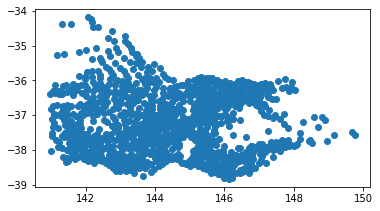

In [ ]:
import geopandas
world = geopandas.read_file('data_fire.gml')
world.plot()